In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
wine_data = pd.read_csv("../Data/winequality.csv", sep=';')

In [4]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

All the columns in wine dataset are numeric. There is no missing value in the dataset

In [9]:
import pandas_profiling
wine_report = pandas_profiling.ProfileReport(wine_data)
wine_report.to_file("winereport.html")

In [10]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Gives summary statistics of numeric columns 
Provides information about Mean, Standard Deviation, Quartiles(Q1, Q2, Q3), Minimum and Maximum values of all features

### Data Preparation  - Dividing wine quality into 3 categories

In [11]:
wine_data.shape

(1599, 12)

In [12]:
wine_data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
wine_bad_quality = wine_data.loc[(wine_data['quality'] < 5)]
wine_avg_quality = wine_data.loc[(wine_data['quality'] >= 5) & (wine_data['quality'] <= 6)]
wine_good_quality = wine_data.loc[(wine_data['quality'] > 6)]

print("Bad Quality Wine ===>>>", wine_bad_quality.shape[0])
print("Avarage Quality Wine ===>>>", wine_avg_quality.shape[0])
print("Good Quality Wine ===>>>", wine_good_quality.shape[0])

Bad Quality Wine ===>>> 63
Avarage Quality Wine ===>>> 1319
Good Quality Wine ===>>> 217


### Data Visualization

#### Univariate Analysis

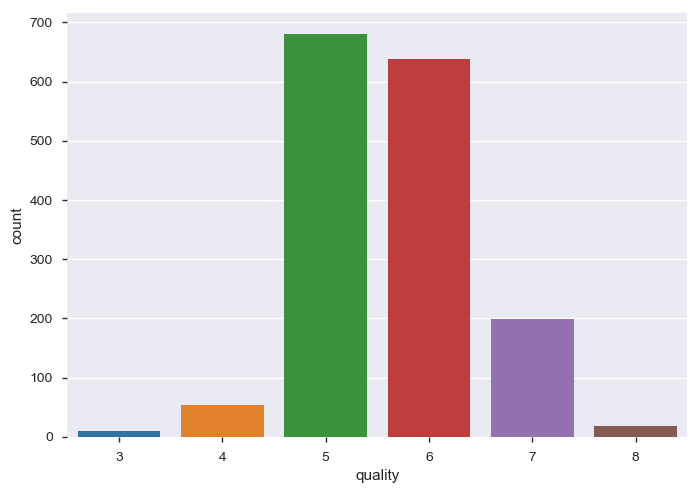

In [14]:
sns.countplot(x='quality', data = wine_data)

Wine quality mostly falls in between range of 5 and 7

Text(0,0.5,'Frequency')

Text(0.5,1,'pH wise distribution of red wine')

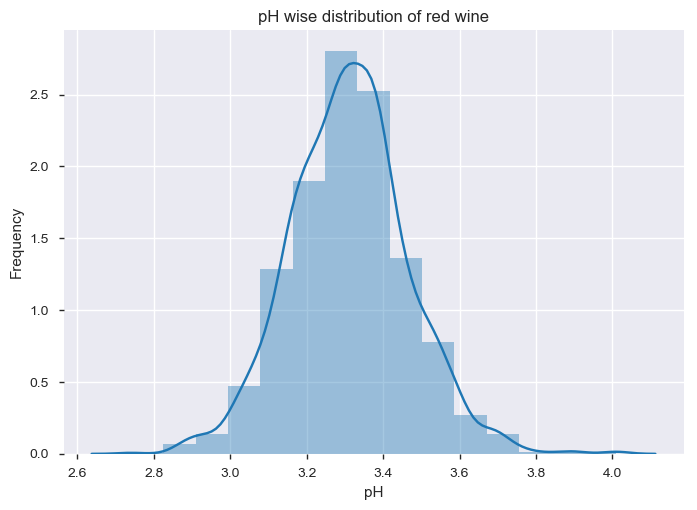

In [15]:
sns.distplot(wine_data["pH"], bins=15, kde=True)
plt.ylabel('Frequency')
plt.title("pH wise distribution of red wine")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000F408D86F28>,
      dtype=object)

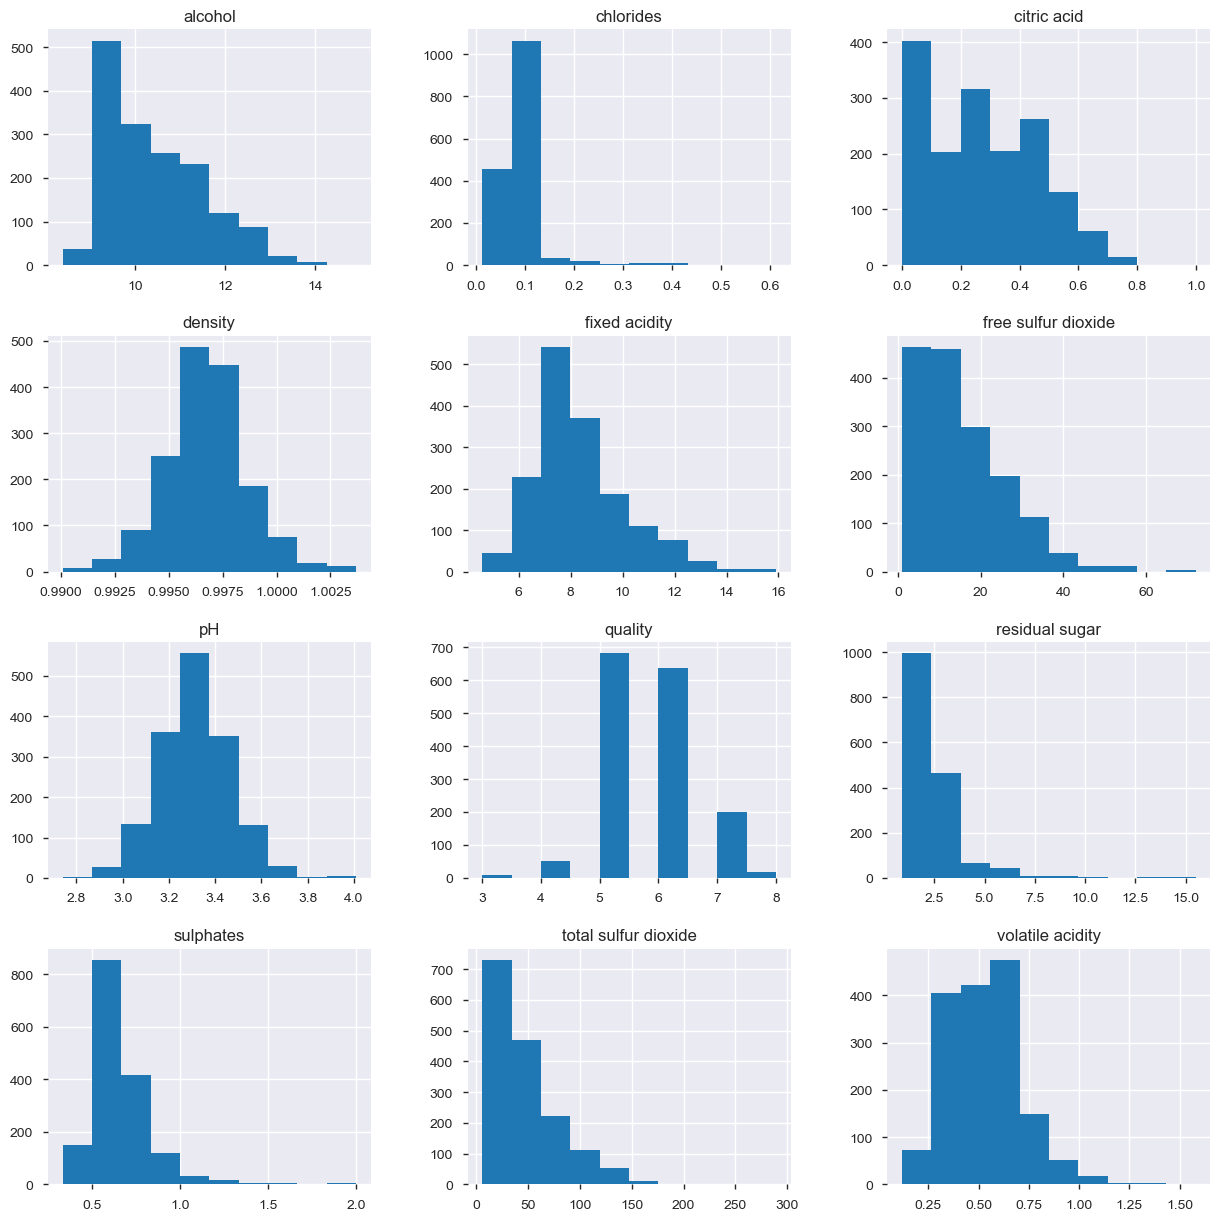

In [16]:
wine_data.hist(bins=10, figsize=(15,15), layout=(4,3))

-  pH is normally distributed.<br>
-  "density" is almost normally distributed.<br> 
-  Distribution of "alcohol", "fixed acidity", "residual sugar", "sulphates", "total sulphar dioxide", "free sulphar dioxide" 
are skewed right.<br> 
-  "quality" is in discrete numbers, and not a continous variable.

#### Bivariate Analysis

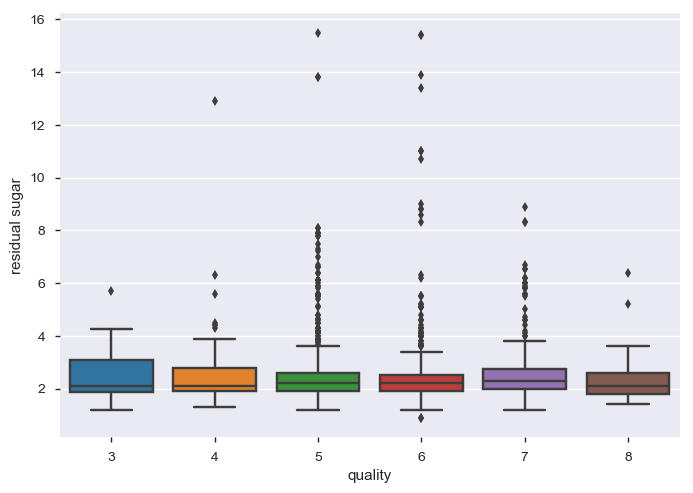

In [17]:
sns.boxplot(x='quality', y='residual sugar',data=wine_data)

Residual Sugar almost has no effect on the quality of the wine. There are many outliers present in higher range - Median values of Residual Sugar shows neither decreasing nor increasing trend with quality. If any line is drawn connecting all the median values it is almost pararrel to x axis

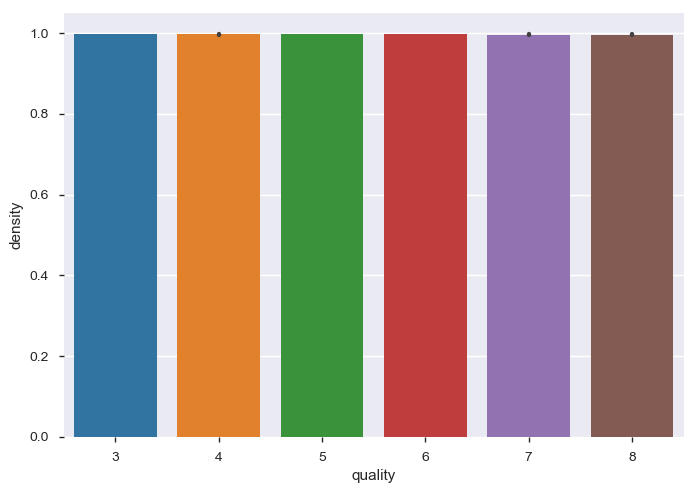

In [18]:
sns.barplot(x='quality', y='density',data=wine_data)

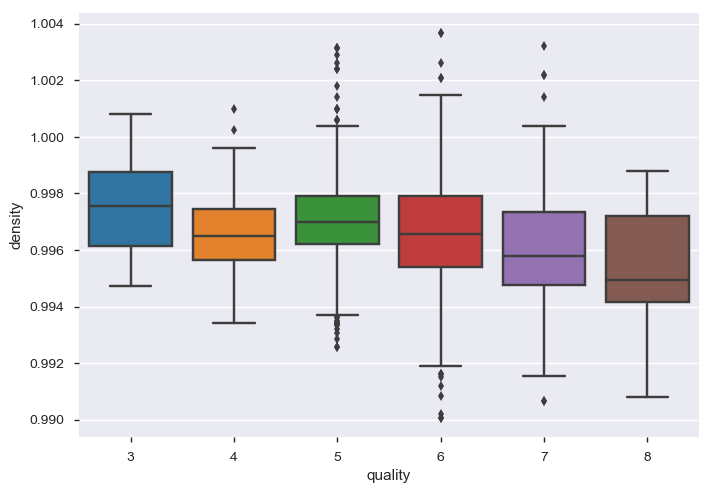

In [19]:
sns.boxplot(x='quality', y='density', data=wine_data)

Looks like density of wines in dataset does not vary too much

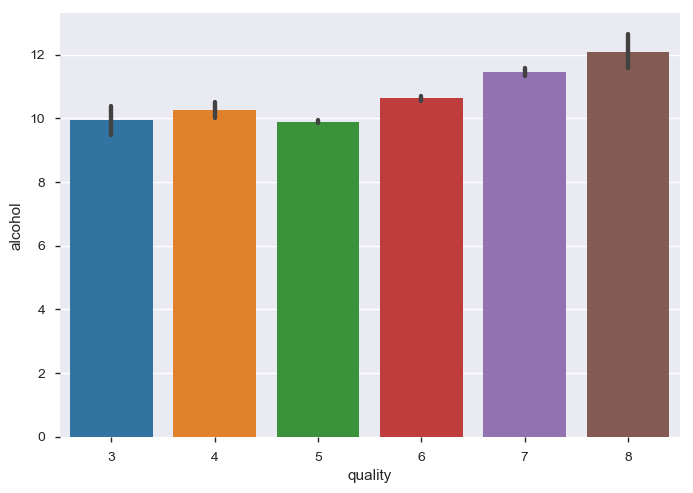

In [20]:
sns.barplot(x='quality', y='alcohol',data=wine_data)

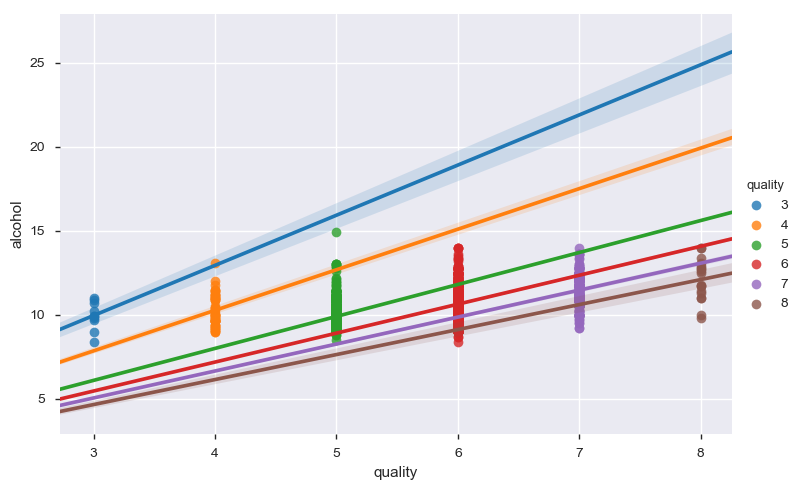

In [21]:
sns.lmplot(y='alcohol', x='quality', data=wine_data, fit_reg = True, aspect=1.5, hue='quality')

The higher the alcohol percentage, the better the wine quality

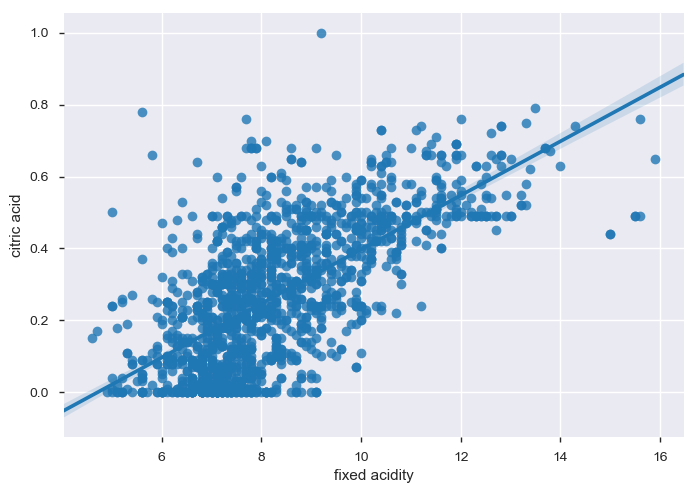

In [22]:
sns.regplot(x='fixed acidity', y='citric acid',data=wine_data)

If the quantity of citric acid increases, fixed acidity level will be increased

#### Faulty Wine Characteristics

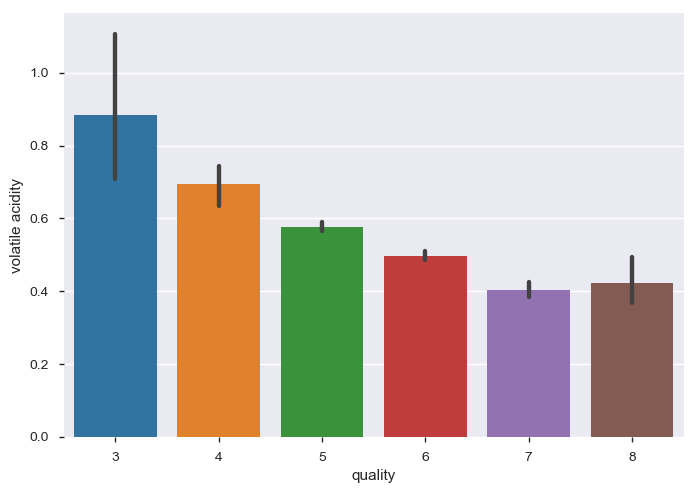

In [23]:
sns.barplot(x='quality', y='volatile acidity',data=wine_data)

Median values of volatile acidity showes decreasing trend with quality. Volatile acidity generally decreases wine quality

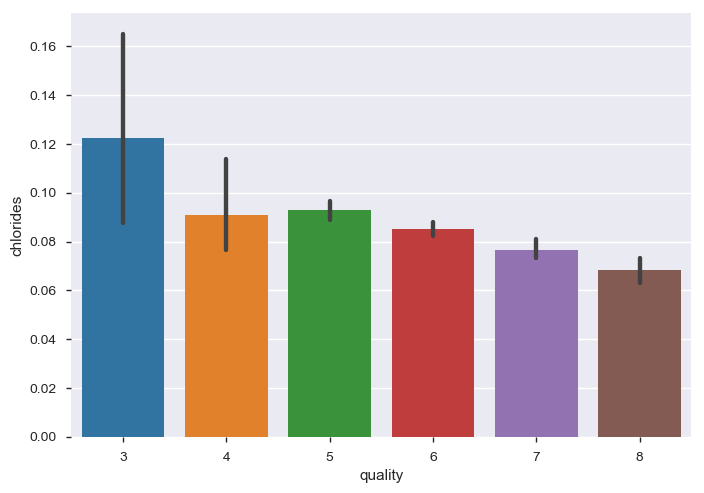

In [24]:
sns.barplot(x='quality', y='chlorides',data=wine_data)

Higher level of chloride presence indicates wine taste becoming salty.

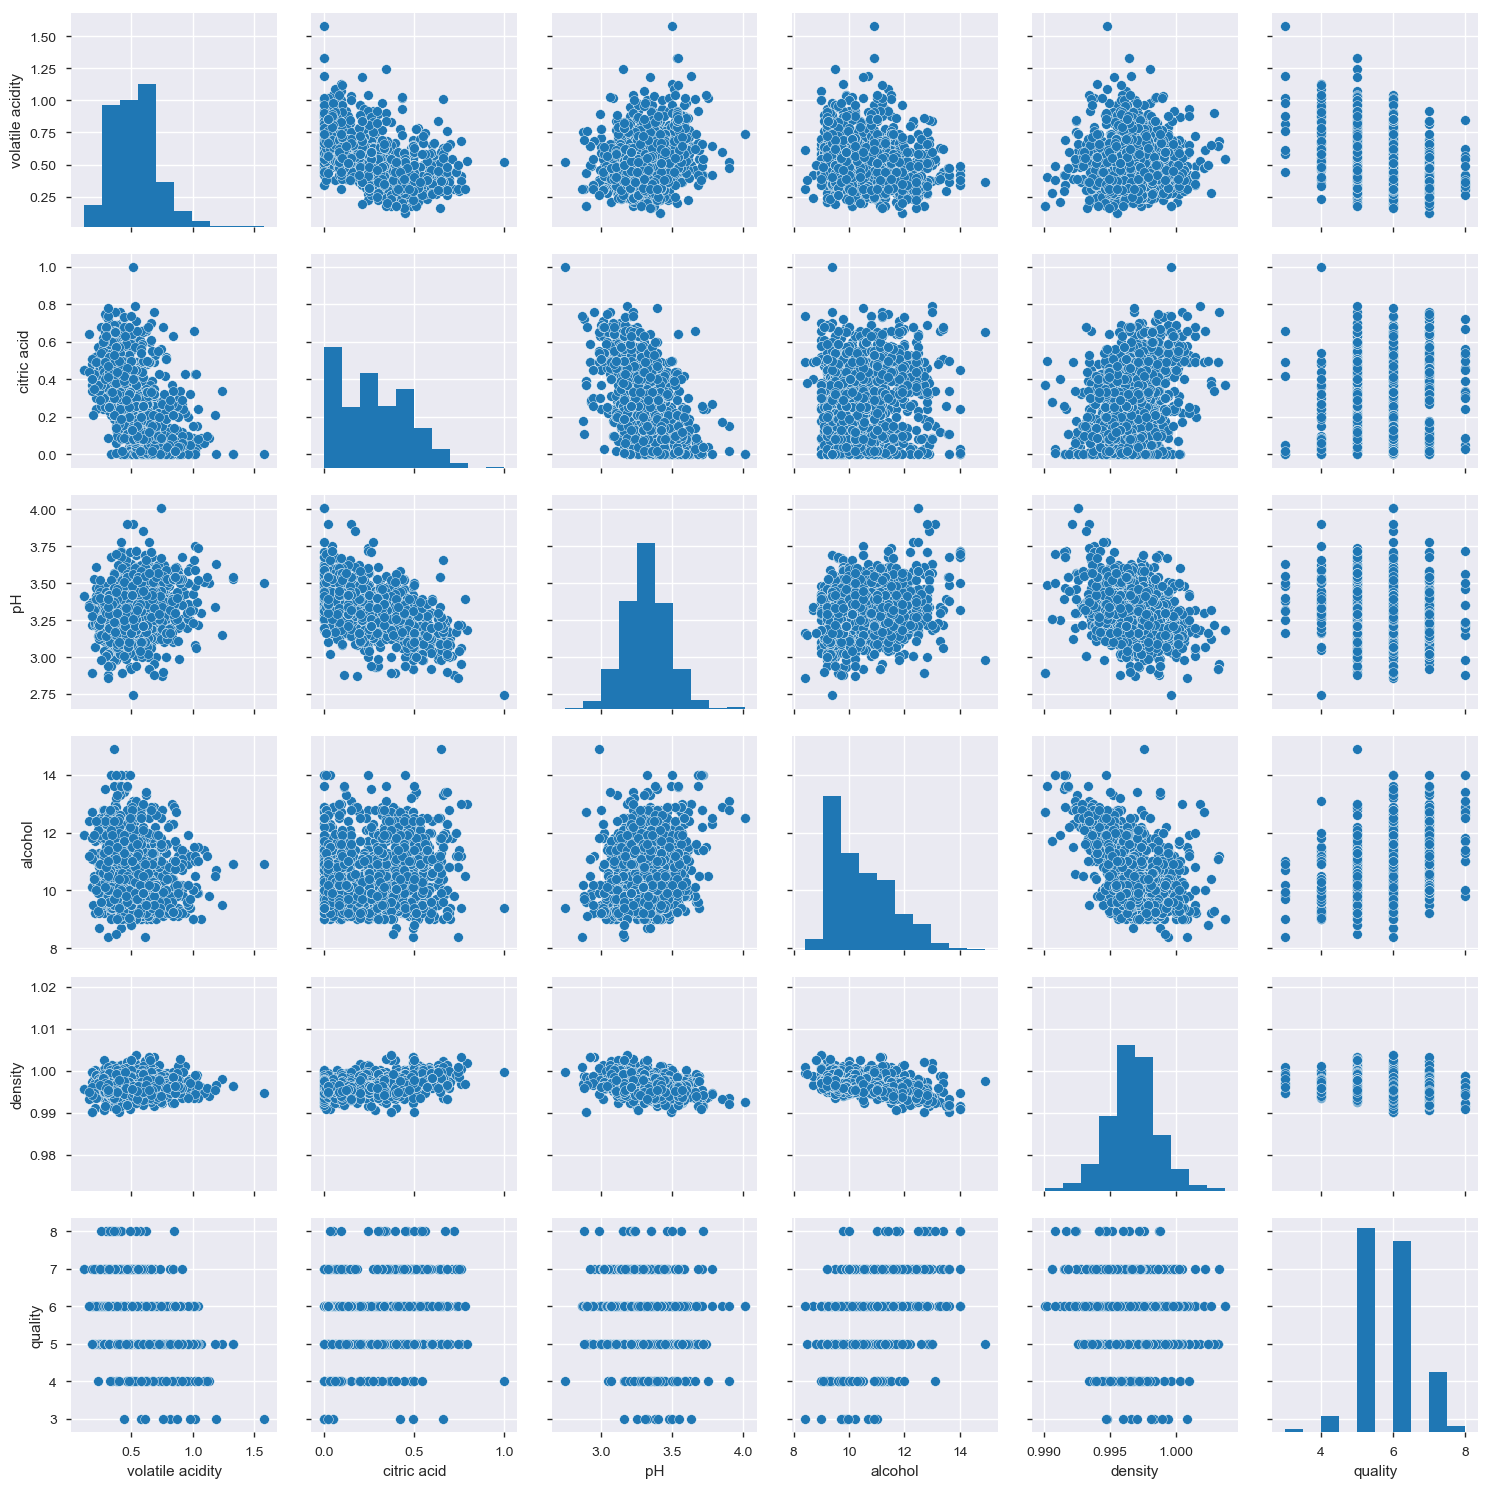

In [25]:
# sns.pairplot(wine_data)
sns.pairplot(wine_data[['volatile acidity', 'citric acid', 'pH', 'alcohol', 'density', 'quality']])

Pair plots displays both histogram and scatter plot. Histogram is displayed diagonally mentioning distribution about individual feature. Scatter plots on upper and lower triangles display relationship between two features

#### Multivariate Analysis

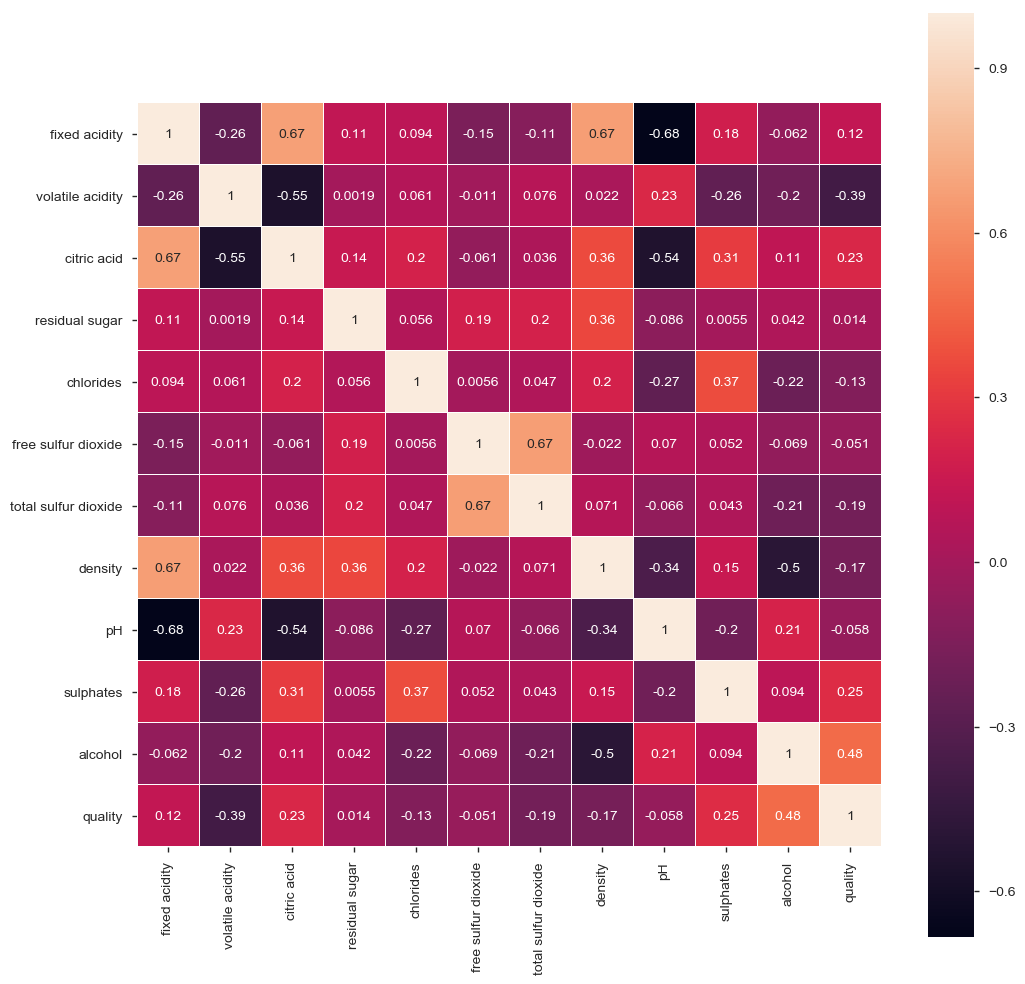

In [26]:
correlation = wine_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation, annot=True, square=True, linewidths=0.1)
plt.show();

Alcohol has the highest correlation with wine quality, followed by sulphates, citric acid, fixed acidity etc. Volatile acidity is least correlated with quality